In [49]:
import random
import math
import matplotlib.pyplot as plt



In [50]:
def fitness(x, y):
    # Define the fitness function
    fitness_val = ((1*1.38*pow(10,-23)*x)/(1.6*pow(10,-19)))*(math.log(2.54/1e-11)+math.log(y))
    return fitness_val



In [51]:
def generate_population(size):
    # Generate a random population of size 'size'
    population = []
    for i in range(size):
        x = random.uniform(283, 313) # Random x value between 283 and 313
        y = random.uniform(500, 1000) # Random y value between 0 and 10
        population.append((x, y))
    return population



In [52]:
def select_parents(population):
    # Select two parents randomly from the population
    parents = random.sample(population, 2)
    return parents



In [53]:
def select_parents_2(population, tournament_size=5):
    # Select two parents using tournament selection
    tournament = random.sample(population, tournament_size)
    parent1 = max(tournament, key=lambda individual: fitness(individual[0], individual[1]))
    tournament.remove(parent1)
    parent2 = max(tournament, key=lambda individual: fitness(individual[0], individual[1]))
    return parent1, parent2




In [54]:
def crossover(parents):
    # Perform crossover by taking the average of x and y values of the parents
    x1, y1 = parents[0]
    x2, y2 = parents[1]
    child_x = (x1 + x2) / 2
    child_y = (y1 + y2) / 2
    return (child_x, child_y)


In [55]:
def crossover_2(parents, swap_prob=0.2):
    # Perform crossover by swapping x and y values of the parents with some probability
    x1, y1 = parents[0]
    x2, y2 = parents[1]
    if random.random() < swap_prob:
        child_x = x2
        child_y = y1
    else:
        child_x = x1
        child_y = y2
    return (child_x, child_y)




In [56]:
def mutate(child):
    # Mutate the child by randomly perturbing its x and y values
    mutation_rate = 0.1
    x, y = child
    if random.random() < mutation_rate:
        x += random.uniform(-1, 1)
    if random.random() < mutation_rate:
        y += random.uniform(-1, 1)
    return (x, y)



In [57]:
gen = []
fit_store = []
def genetic_algorithm(population_size, generations):
    # Initialize a random population
    population = generate_population(population_size)
    
    # Run the genetic algorithm for 'generations' iterations
    for generation in range(generations):

        new_population = []
        for i in range(population_size):
            parents = select_parents(population)
            child = crossover(parents)
            child = mutate(child)
            new_population.append(child)
        

        gen.append(generation)

        fitness_scores = [fitness(x, y) for (x, y) in new_population]
        fit_store.append(fitness_scores)
        

        population = [new_population[i] for i in sorted(range(population_size), key=lambda i: fitness_scores[i], reverse=True)[:population_size]]
        

        best_individual = population[0]
        print(f"Generation {generation+1}: Best individual - x:{best_individual[0]}, y:{best_individual[1]}, Fitness: {fitness(best_individual[0], best_individual[1])}")
    

    return population[0]



In [58]:
best_individual = genetic_algorithm(population_size=100, generations=50)
print(f"Best individual - x:{best_individual[0]}, y:{best_individual[1]}, Fitness: {fitness(best_individual[0], best_individual[1])}")

Generation 1: Best individual - x:309.55100333098983, y:827.8680979585788, Fitness: 0.8805109887157284
Generation 2: Best individual - x:306.27995349908554, y:881.7988641326615, Fitness: 0.8728737181115185
Generation 3: Best individual - x:306.6825629489908, y:828.3832719560454, Fitness: 0.872368228737008
Generation 4: Best individual - x:304.1011725211222, y:773.1829572774813, Fitness: 0.8632166431918491
Generation 5: Best individual - x:301.136527724763, y:803.111365667972, Fitness: 0.8557876460912
Generation 6: Best individual - x:300.5413441708979, y:791.4569244315162, Fitness: 0.8537172965408204
Generation 7: Best individual - x:299.4426577872176, y:752.9021756198235, Fitness: 0.8493065689440256
Generation 8: Best individual - x:298.89484175815755, y:779.9625880489696, Fitness: 0.84866310038233
Generation 9: Best individual - x:298.7906939951952, y:763.6350311811227, Fitness: 0.8478221852672505
Generation 10: Best individual - x:298.78480908820677, y:757.8372292240992, Fitness: 0.

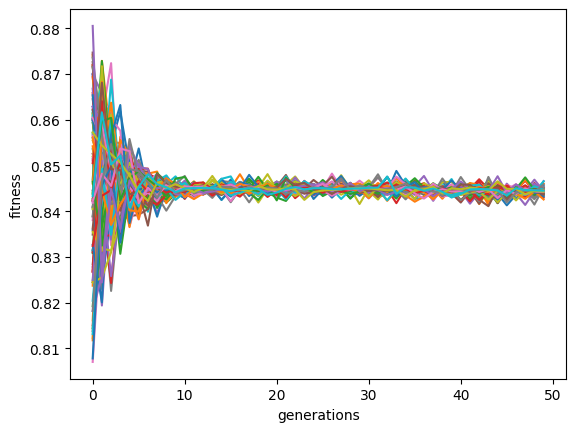

In [59]:
plt.plot(gen,fit_store)
plt.xlabel('generations')
plt.ylabel('fitness')
plt.show()

Variations


In [60]:
gen_2 = []
fit_store_2 = []
def genetic_algorithm_2(population_size, generations):
    # Initialize a random population
    population = generate_population(population_size)
    
    # Run the genetic algorithm for 'generations' iterations
    for generation in range(generations):
        # Select parents, perform crossover, and mutate to generate a new population
        new_population = []
        for i in range(population_size):
            parents = select_parents_2(population)
            child = crossover_2(parents)
            child = mutate(child)
            new_population.append(child)
        gen_2.append(generation)
        # Calculate fitness for each individual in the population
        fitness_scores = [fitness(x, y) for (x, y) in new_population]
        fit_store_2.append(fitness_scores)
        # Select the top individuals as the new population
        population = [new_population[i] for i in sorted(range(population_size), key=lambda i: fitness_scores[i], reverse=True)[:population_size]]
        
        # Print the best individual in the current generation
        best_individual = population[0]
        print(f"Generation {generation+1}: Best individual - x:{best_individual[0]}, y:{best_individual[1]}, Fitness: {fitness(best_individual[0], best_individual[1])}")
    
    # Return the best individual in the final generation
    return population[0]



In [61]:
best_individual = genetic_algorithm_2(population_size=100, generations=50)
print(f"Best individual - x:{best_individual[0]}, y:{best_individual[1]}, Fitness: {fitness(best_individual[0], best_individual[1])}")

Generation 1: Best individual - x:312.52460339163935, y:970.5495804830198, Fitness: 0.8932554457994781
Generation 2: Best individual - x:312.764471254601, y:970.5495804830198, Fitness: 0.8939410343020713
Generation 3: Best individual - x:312.764471254601, y:983.9089096681187, Fitness: 0.8943098177976941
Generation 4: Best individual - x:313.44998225231745, y:983.9089096681187, Fitness: 0.8962699484129361
Generation 5: Best individual - x:313.44998225231745, y:970.5495804830198, Fitness: 0.8959003566249231
Generation 6: Best individual - x:314.399901168658, y:970.8672462766226, Fitness: 0.8986242817273984
Generation 7: Best individual - x:314.65663576756486, y:970.5495804830198, Fitness: 0.8993492045299858
Generation 8: Best individual - x:315.3806069374352, y:970.144792494619, Fitness: 0.9014071060716634
Generation 9: Best individual - x:315.88856837216247, y:970.5495804830198, Fitness: 0.9028703049360737
Generation 10: Best individual - x:315.5779316304371, y:983.9089096681187, Fitnes

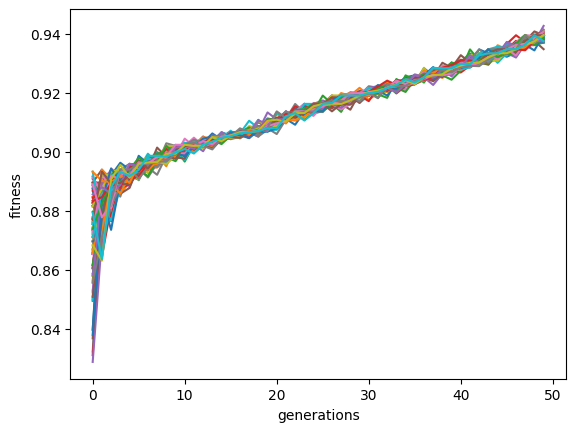

In [62]:
plt.plot(gen_2,fit_store_2)
plt.xlabel('generations')
plt.ylabel('fitness')
plt.show()